# Transformaciones Geométricas y Ecualización de Histogramas

## Objetivo
Analizar y aplicar técnicas de **procesamiento digital de imágenes** que incluyan transformaciones geométricas (rotación, traslación y escalado) y **ecualización de histogramas**, con el fin de comprender cómo se modifican las propiedades espaciales y tonalidades de una imagen.

---

## Fundamentación Teórica

### 1. Procesamiento Digital de Imágenes
El procesamiento digital de imágenes consiste en aplicar **operaciones matemáticas y computacionales** sobre una imagen para mejorar su calidad, extraer información o modificar su estructura visual. Las imágenes son tratadas como matrices numéricas, donde cada píxel representa un valor de intensidad o color.

---

### 2. Transformaciones Geométricas

Las **transformaciones geométricas** alteran la posición, orientación o tamaño de los píxeles de una imagen, manteniendo su contenido original. Son esenciales en tareas como la alineación, rotación, registro o corrección de perspectiva.

#### a) Rotación
Consiste en girar la imagen un ángulo determinado respecto a un punto de referencia, generalmente el centro.  
Se representa mediante una **matriz de rotación**:



\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}


Esta operación se implementa en OpenCV con la función `cv2.getRotationMatrix2D()`.

####  b) Traslación
Desplaza todos los píxeles una distancia fija en los ejes X y Y.  
Se describe mediante la **matriz de traslación**:


\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y
\end{bmatrix}


donde \(t_x\) y \(t_y\) son los desplazamientos horizontales y verticales respectivamente.

####  c) Escalado
Cambia el tamaño de la imagen multiplicando sus dimensiones por un factor de escala \(s\).  

\begin{bmatrix}
s_x & 0 \\
0 & s_y
\end{bmatrix}

Un valor de \(s > 1\) amplía la imagen, mientras que \(s < 1\) la reduce.

En OpenCV, las transformaciones afines combinan estos efectos y se aplican con `cv2.warpAffine()`.

---

### 3. Creación de GIF Animado

La generación de un GIF a partir de una secuencia de imágenes transformadas permite **visualizar dinámicamente** los cambios geométricos (rotación y escala progresiva).  
Este proceso se realiza usando la librería `PIL` o `imageio`, que combinan varios fotogramas en una animación continua.

---

### 4. Histogramas de Imágenes

Un **histograma** representa la distribución de los niveles de intensidad de los píxeles en una imagen.  
- En imágenes **claras**, el histograma se concentra en los valores altos (cercanos a 255).  
- En imágenes **oscuras**, predomina en los valores bajos (cercanos a 0).  
- En imágenes **de buen contraste**, el histograma cubre una mayor parte del rango tonal.

La función `cv2.calcHist()` permite obtener el histograma de una imagen en OpenCV.

---

### 5. Ecualización de Histograma

La **ecualización de histograma** es una técnica de mejora del contraste que redistribuye los niveles de intensidad de una imagen, buscando que los valores se repartan de forma más uniforme.  
Su objetivo es **aumentar el rango dinámico** visible y resaltar detalles en zonas oscuras o muy iluminadas.

Matemáticamente, se basa en la **función de distribución acumulativa (CDF)** del histograma normalizado.

En OpenCV, se implementa mediante:
```python
cv2.equalizeHist(imagen_gris)


📂 Carpeta de entrada: c:\Users\sebastiang\Documents\GitHub\Trabajo_01_Quartz_Meditativo\Rotacion_Traslacion_Ecualizacion\Input
📂 Carpeta de salida: c:\Users\sebastiang\Documents\GitHub\Trabajo_01_Quartz_Meditativo\Rotacion_Traslacion_Ecualizacion\Output
✅ Imagen cargada: casa_dia.jpg
✅ Imagen cargada: casa_noche.jpg


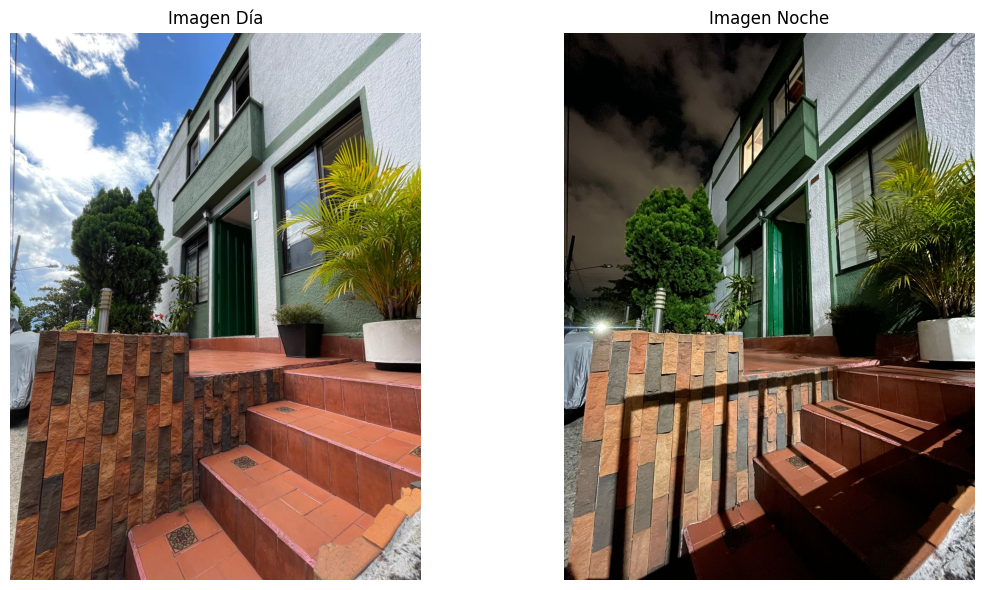

💾 Imagen guardada en: Output\imagenes_originales.png


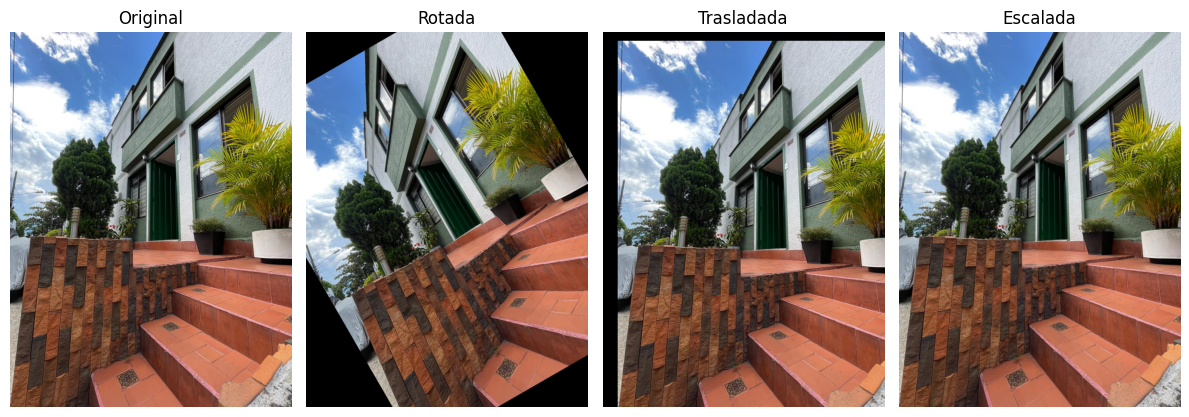

💾 Imagen guardada en: Output\transformaciones.png
💾 GIF creado: Output\transformaciones.gif


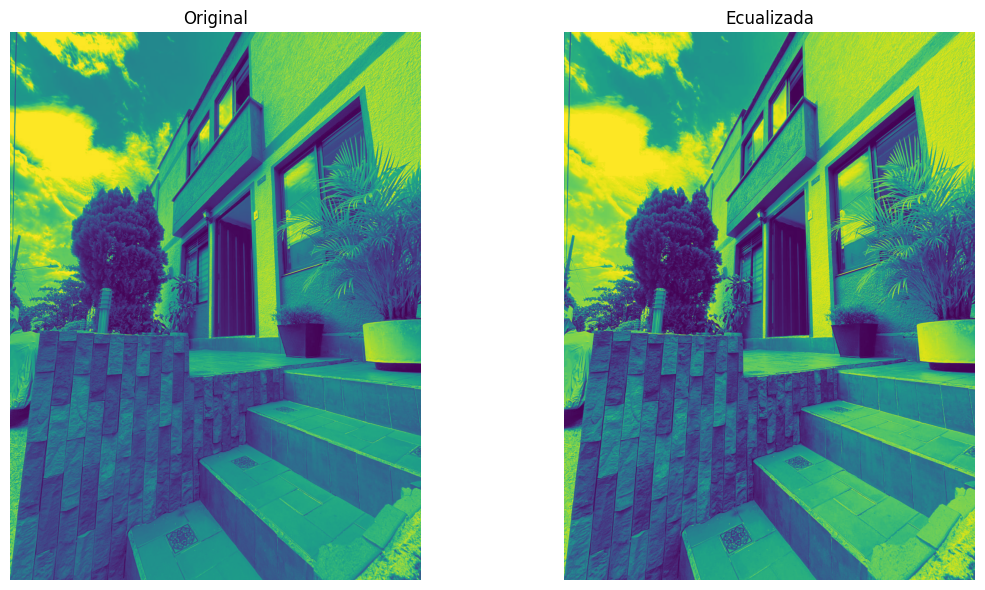

💾 Imagen guardada en: Output\ecualizacion.png


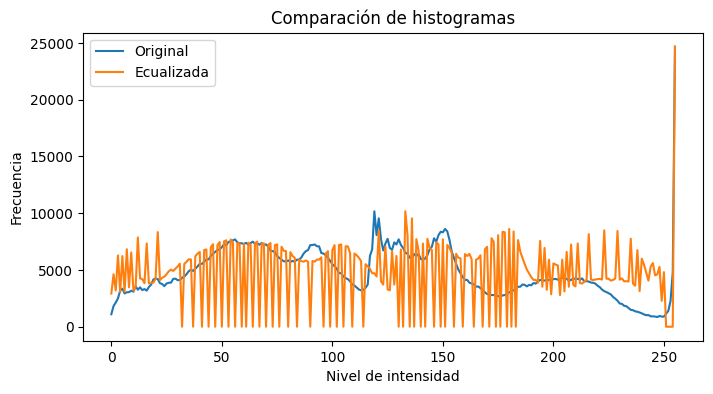

💾 Histograma guardado: Output\histograma_ecualizacion.png


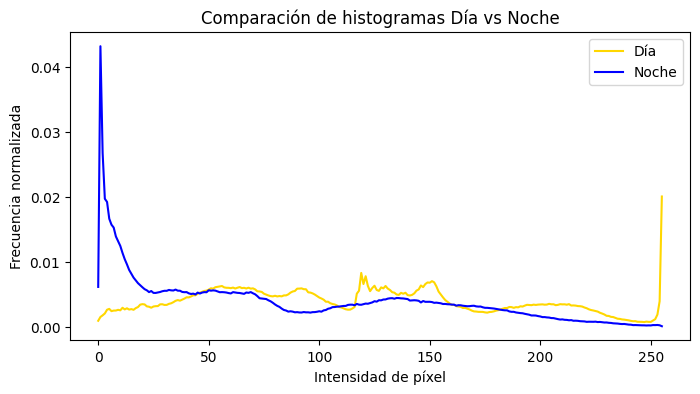

💾 Comparación guardada: Output\comparacion_histogramas.png


In [2]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imageio
import os

# ==============================================
# CONFIGURACIÓN DE CARPETAS
# ==============================================
INPUT_DIR = "Input"
OUTPUT_DIR = "Output"

os.makedirs(INPUT_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("📂 Carpeta de entrada:", os.path.abspath(INPUT_DIR))
print("📂 Carpeta de salida:", os.path.abspath(OUTPUT_DIR))

# ==============================================
# FUNCIONES AUXILIARES
# ==============================================

def cargar_imagen(nombre_archivo):
    """Carga una imagen desde la carpeta Input y la devuelve en RGB"""
    ruta = os.path.join(INPUT_DIR, nombre_archivo)
    if not os.path.exists(ruta):
        raise FileNotFoundError(f"❌ No se encontró la imagen: {ruta}")
    img = cv2.imread(ruta)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(f"✅ Imagen cargada: {nombre_archivo}")
    return img, ruta


def mostrar_imagenes(imagenes, titulos, nombre_salida, figsize=(12, 6)):
    """Muestra una lista de imágenes con sus títulos y las guarda en Output"""
    n = len(imagenes)
    plt.figure(figsize=figsize)
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(imagenes[i])
        plt.title(titulos[i])
        plt.axis("off")

    plt.tight_layout()
    ruta_salida = os.path.join(OUTPUT_DIR, nombre_salida)
    plt.savefig(ruta_salida)
    plt.show()
    print(f"💾 Imagen guardada en: {ruta_salida}")


def transformar_imagen(img, angulo=0, traslacion=(0, 0), escala=1.0):
    """Aplica rotación, traslación y escala a una imagen"""
    h, w = img.shape[:2]
    center = (w // 2, h // 2)

    # Rotación + Escala
    M_rot = cv2.getRotationMatrix2D(center, angulo, escala)
    transformed = cv2.warpAffine(img, M_rot, (w, h))

    # Traslación
    tx, ty = traslacion
    M_trans = np.float32([[1, 0, tx], [0, 1, ty]])
    transformed = cv2.warpAffine(transformed, M_trans, (w, h))

    return transformed


def crear_gif(imagen, pasos=8, duracion=300, nombre="transformaciones.gif"):
    """Crea un GIF de transformaciones rotación + escala decreciente"""
    h, w = imagen.shape[:2]
    center = (w // 2, h // 2)
    frames = []

    for i in range(pasos):
        angle = 15 * i
        scale = max(0.1, 1 - i * 0.05)
        M = cv2.getRotationMatrix2D(center, angle, scale)
        transformed = cv2.warpAffine(imagen, M, (w, h))
        frames.append(Image.fromarray(transformed))

    ruta_gif = os.path.join(OUTPUT_DIR, nombre)
    frames[0].save(ruta_gif, save_all=True, append_images=frames[1:], duration=duracion, loop=0)
    print(f"💾 GIF creado: {ruta_gif}")


def ecualizar_histograma(img, nombre="ecualizacion.png"):
    """Convierte a gris y ecualiza el histograma"""
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    eq = cv2.equalizeHist(gray)

    # Mostrar y guardar imágenes
    mostrar_imagenes([gray, eq], ["Original", "Ecualizada"], nombre)

    # Mostrar histogramas
    hist_original = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist_eq = cv2.calcHist([eq], [0], None, [256], [0, 256])

    plt.figure(figsize=(8, 4))
    plt.plot(hist_original, label="Original")
    plt.plot(hist_eq, label="Ecualizada")
    plt.title("Comparación de histogramas")
    plt.xlabel("Nivel de intensidad")
    plt.ylabel("Frecuencia")
    plt.legend()

    ruta_hist = os.path.join(OUTPUT_DIR, "histograma_ecualizacion.png")
    plt.savefig(ruta_hist)
    plt.show()
    print(f"💾 Histograma guardado: {ruta_hist}")


def comparar_histogramas(nombres_archivos, etiquetas=["Día", "Noche"], nombre="comparacion_histogramas.png"):
    """Compara histogramas de imágenes Día y Noche"""
    if len(nombres_archivos) < 2:
        print("⚠️ Se requieren al menos dos imágenes para comparar histogramas.")
        return

    hists = []
    for archivo in nombres_archivos:
        ruta = os.path.join(INPUT_DIR, archivo)
        img = cv2.imread(ruta)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
        hist /= hist.sum()
        hists.append(hist)

    plt.figure(figsize=(8, 4))
    colores = ['gold', 'blue']
    for i in range(2):
        plt.plot(hists[i], label=etiquetas[i], color=colores[i])
    plt.title("Comparación de histogramas Día vs Noche")
    plt.xlabel("Intensidad de píxel")
    plt.ylabel("Frecuencia normalizada")
    plt.legend()

    ruta_salida = os.path.join(OUTPUT_DIR, nombre)
    plt.savefig(ruta_salida)
    plt.show()
    print(f"💾 Comparación guardada: {ruta_salida}")

# ==============================================
# 1. CARGAR IMÁGENES DESDE INPUT
# ==============================================
img_dia, ruta_dia = cargar_imagen("casa_dia.jpg")
img_noche, ruta_noche = cargar_imagen("casa_noche.jpg")

mostrar_imagenes([img_dia, img_noche], ["Imagen Día", "Imagen Noche"], "imagenes_originales.png")

# ==============================================
# 2. TRANSFORMACIONES GEOMÉTRICAS
# ==============================================
rotated = transformar_imagen(img_dia, angulo=30)
translated = transformar_imagen(img_dia, traslacion=(50, 30))
scaled = cv2.resize(img_dia, None, fx=1.5, fy=1.5)

mostrar_imagenes(
    [img_dia, rotated, translated, scaled],
    ["Original", "Rotada", "Trasladada", "Escalada"],
    "transformaciones.png"
)

# ==============================================
# 3. CREAR GIF DE TRANSFORMACIONES
# ==============================================
crear_gif(img_dia)

# ==============================================
# 4. ECUALIZACIÓN DE HISTOGRAMA
# ==============================================
ecualizar_histograma(img_dia)

# ==============================================
# 5. COMPARAR HISTOGRAMAS DÍA VS NOCHE
# ==============================================
comparar_histogramas(["casa_dia.jpg", "casa_noche.jpg"])


## Conclusiones

1. **Aplicación de transformaciones geométricas:**  
   Las operaciones de rotación, traslación y escalado permiten modificar la posición, orientación y tamaño de una imagen sin alterar su información estructural. Estas transformaciones son fundamentales para tareas de alineación, análisis espacial y visión por computadora.

2. **Visualización dinámica mediante GIF:**  
   La creación de un GIF que combina varias transformaciones sucesivas facilita comprender de forma visual cómo varía la imagen al modificar parámetros como el ángulo de rotación y el factor de escala, demostrando la naturaleza progresiva de los cambios geométricos.

3. **Mejora del contraste por ecualización:**  
   La ecualización de histograma redistribuye los niveles de intensidad de una imagen, aumentando su rango dinámico y mejorando la percepción de detalles en zonas oscuras o sobreexpuestas. Es una herramienta eficaz para optimizar imágenes con mala iluminación.

4. **Comparación de histogramas día y noche:**  
   Al analizar imágenes capturadas en condiciones de iluminación distintas, se observa que las imágenes diurnas concentran su histograma en valores altos (brillantes), mientras que las nocturnas lo hacen en valores bajos (oscuros). La ecualización equilibra ambas distribuciones, evidenciando su capacidad de mejorar el contraste independientemente de la hora o las condiciones lumínicas.
